
# Overview, làm sạch, chuẩn hóa dữ liệu



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install eli5
from collections import Counter
import missingno as msno
import warnings
import plotly.express as px
from google.colab import drive

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107721 sha256=d76a3a9fef33078d907176cdfd769267628530ffac8b6cc6b1a0261896a9880d
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [3]:
file_path = '/content/drive/MyDrive/Datasets/fifa.csv'
fifa = pd.read_csv(file_path)

In [4]:
print(f'Trước khi xóa các cột không cần thiết: {fifa.shape[1]}')

fifa.drop(['Photo','Flag','Club Logo', 'Jersey Number', 'Loaned From', 'Real Face',
           'Release Clause', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM',
          'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB'], axis=1,inplace=True)

print(f'Sau khi xóa các cột không cần thiết: {fifa.shape[1]}')

Trước khi xóa các cột không cần thiết: 88
Sau khi xóa các cột không cần thiết: 55


In [ ]:
print(fifa.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     18207 non-null  object 
 8   Wage                      18207 non-null  object 
 9   Special                   18207 non-null  int64  
 10  Preferred Foot            18159 non-null  object 
 11  International Reputation  18159 non-null  float64
 12  Weak Foot                 18159 non-null  float64
 13  Skill Moves               18159 non-null  float64
 14  Work R

In [ ]:
print(fifa.describe().T)

                            count           mean           std    min  \
ID                        18207.0  214298.338606  29965.244204   16.0   
Age                       18207.0      25.122206      4.669943   16.0   
Overall                   18207.0      66.238699      6.908930   46.0   
Potential                 18207.0      71.307299      6.136496   48.0   
Special                   18207.0    1597.809908    272.586016  731.0   
International Reputation  18159.0       1.113222      0.394031    1.0   
Weak Foot                 18159.0       2.947299      0.660456    1.0   
Skill Moves               18159.0       2.361308      0.756164    1.0   
Crossing                  18159.0      49.734181     18.364524    5.0   
Finishing                 18159.0      45.550911     19.525820    2.0   
HeadingAccuracy           18159.0      52.298144     17.379909    4.0   
ShortPassing              18159.0      58.686712     14.699495    7.0   
Volleys                   18159.0      42.909026   

In [ ]:
# kiểm tra các giá trị bị trùng lắp trong cột
for col in fifa.columns:
    print(f'{col}: {fifa[col].duplicated().sum()}')


ID: 0
Name: 1013
Age: 18178
Nationality: 18043
Overall: 18159
Potential: 18160
Club: 17555
Value: 17990
Wage: 18063
Special: 16785
Preferred Foot: 18204
International Reputation: 18201
Weak Foot: 18201
Skill Moves: 18201
Work Rate: 18197
Body Type: 18196
Position: 18179
Joined: 16470
Contract Valid Until: 18170
Height: 18185
Weight: 18149
Crossing: 18117
Finishing: 18113
HeadingAccuracy: 18115
ShortPassing: 18121
Volleys: 18119
Dribbling: 18112
Curve: 18117
FKAccuracy: 18116
LongPassing: 18122
BallControl: 18116
Acceleration: 18120
SprintSpeed: 18121
Agility: 18125
Reactions: 18138
Balance: 18125
ShotPower: 18114
Jumping: 18132
Stamina: 18121
Strength: 18132
LongShots: 18114
Aggression: 18121
Interceptions: 18117
Positioning: 18112
Vision: 18121
Penalties: 18119
Composure: 18122
Marking: 18114
StandingTackle: 18116
SlidingTackle: 18118
GKDiving: 18135
GKHandling: 18136
GKKicking: 18127
GKPositioning: 18127
GKReflexes: 18130


In [5]:
print(f'Trước khi lọc tên bị trùng: {fifa.shape[0]}')

# Lọc ra các bản ghi có trùng tên
list_name = fifa[fifa['Name'].duplicated(keep=False)]
print(f'Sau khi lọc tên bị trùng: {list_name["Name"].count()}')

# Lọc các bản ghi có trùng cả Name và Nationality
duplicate_players = list_name[list_name.duplicated(subset=['Name', 'Nationality'], keep=False)]
print(f'Sau khi lọc tên và quốc gia cùng bị trùng: {duplicate_players["Name"].count()}')

# Lọc các bản ghi có trùng cả Name và Nationality và Age
duplicate_players = duplicate_players[duplicate_players.duplicated(subset=['Name', 'Nationality', 'Age'], keep=False)]
print(f'Sau khi lọc tên và quốc gia và tuổi cùng bị trùng: {duplicate_players["Name"].count()}')

# Sắp xếp kết quả theo Name và Nationality
sorted_duplicates = duplicate_players.sort_values(by=['Name', 'Nationality'])
print(sorted_duplicates[['Name', 'Nationality', 'Age']])

Trước khi lọc tên bị trùng: 18207
Sau khi lọc tên bị trùng: 1775
Sau khi lọc tên và quốc gia cùng bị trùng: 956
Sau khi lọc tên và quốc gia và tuổi cùng bị trùng: 78
                Name   Nationality  Age
8843    A. Al Ghamdi  Saudi Arabia   23
15872   A. Al Ghamdi  Saudi Arabia   23
1871   A. Donnarumma         Italy   27
9748   A. Donnarumma         Italy   27
986     A. Miranchuk        Russia   22
...              ...           ...  ...
4975            Saúl         Spain   23
9452        Zhang Lu      China PR   30
15731       Zhang Lu      China PR   30
3773          Álvaro         Spain   27
7494          Álvaro         Spain   27

[78 rows x 3 columns]


In [6]:
# Xóa các cột dữ liệu trong duplicate_players
print(f'Trước khi xóa tên bị trùng: {fifa.shape[0]}')
fifa.drop(sorted_duplicates.index, inplace=True)
print(f'Sau khi xóa tên bị trùng: {fifa.shape[0]}')

Trước khi xóa tên bị trùng: 18207
Sau khi xóa tên bị trùng: 18129


In [7]:
# kiểm tra giá trị thị thiếu
x = fifa.isnull().sum()
y = (fifa.isnull().sum()/fifa.shape[0]) * 100

z = {'No. of missing values' :x, '% of missing values' :y}

df = pd.DataFrame(z, columns = ['No. of missing values', '% of missing values'])
df.sort_values(by='% of missing values', ascending=False)

,No. of missing values,% of missing values
Joined,1545,8.522257
Contract Valid Until,287,1.583099
Club,239,1.318330
Position,60,0.330961
Curve,48,0.264769
Aggression,48,0.264769
SprintSpeed,48,0.264769
Agility,48,0.264769
Reactions,48,0.264769
Balance,48,0.264769


In [22]:
print(fifa[['Value', 'Wage', 'Height','Weight', 'Contract Valid Until']].head(2))
print("Kiểu dữ liệu của các cột trên:")
print(fifa[['Value', 'Wage', 'Height','Weight', 'Contract Valid Until']].dtypes)

     Value   Wage Height  Weight Contract Valid Until
0  €110.5M  €565K    5'7  159lbs                 2021
1     €77M  €405K    6'2  183lbs                 2022
Kiểu dữ liệu của các cột trên:
Value                   object
Wage                    object
Height                  object
Weight                  object
Contract Valid Until    object
dtype: object


In [8]:
def convert_value(fifa_value):
    try:
        value = int(float(fifa_value[1:-1]))  # Bỏ qua ký tự đầu tiên và cuối cùng (vd: €110.5M -> 110.5)
        suffix = fifa_value[-1]

        if suffix == 'M':
            value *= 1000000
        elif suffix == 'K':
            value *= 1000
        else:
            value = 0  # Nếu không có hậu tố 'M' hoặc 'K', giá trị là 0

        return value
    except ValueError:
        return 0  # Xử lý trường hợp ngoại lệ khi không thể chuyển đổi sang số

fifa['Value'] = fifa['Value'].apply(convert_value)
fifa['Wage'] = fifa['Wage'].apply(convert_value)
print(fifa[['Value', 'Wage']].head(3))


       Value    Wage
0  110000000  565000
1   77000000  405000
2  118000000  290000


In [9]:
def replace_height(height): #Chuyển sang ft qua cm
    try:
        return height.replace("'", ".")
    except AttributeError:
        return 5.8

def feet_to_cm(height_feet): #chiểu đơn vị đo cho height
    height_cm=round(float(height_feet)/int(1)*int(12)*float(2.54))
    return height_cm

fifa['Height'] = fifa['Height'].map(replace_height)
fifa['Height'] = fifa['Height'].apply(feet_to_cm)
fifa['Height'].unique()

array([174, 189, 180, 195, 156, 177, 183, 171, 155, 201, 186, 165, 192,
       168, 198, 204, 162, 158, 207, 210])

In [10]:
# chuyển đơn vị đo cho weight
def replace_weight(weight):
    try:
        return weight.replace('lbs', '')
    except AttributeError:
        return 165

fifa['Weight'] = fifa['Weight'].apply(replace_weight)
def lbs_to_kg(weight_lbs):
    weight_kg=round(int(weight_lbs)/int(1)*float(0.453592))
    return weight_kg
fifa['Weight'] = fifa['Weight'].apply(lbs_to_kg)
fifa['Weight']

,Weight
0,72
1,83
2,68
3,76
4,70
...,...
18202,61
18203,77
18204,67
18205,70


In [11]:
def year_joined(joined_date): # Joined chỉ lấy năm
    try:
        return joined_date.replace(joined_date, joined_date[-4:])
    except AttributeError:
        return 2018

fifa['Joined'] = fifa['Joined'].apply(year_joined)
def year_joined(joined_date):
    try:
        return joined_date.replace(joined_date, joined_date[-4:])
    except AttributeError:
        return 2020

fifa['Contract Valid Until'] = fifa['Contract Valid Until'].apply(year_joined)
print(fifa['Joined'])

0        2004
1        2018
2        2017
3        2011
4        2015
         ... 
18202    2017
18203    2018
18204    2017
18205    2018
18206    2018
Name: Joined, Length: 18129, dtype: object


In [12]:
print('Sau khi thực hiện chuyển đổi dữ liệu:')
print(fifa[['Value', 'Wage', 'Height','Weight', 'Joined', 'Contract Valid Until']].head())

Sau khi thực hiện chuyển đổi dữ liệu:
       Value    Wage  Height  Weight Joined Contract Valid Until
0  110000000  565000     174      72   2004                 2021
1   77000000  405000     189      83   2018                 2022
2  118000000  290000     180      68   2017                 2022
3   72000000  260000     195      76   2011                 2020
4  102000000  355000     156      70   2015                 2023


In [13]:
fifa['Club'] = fifa['Club'].fillna('No Club')
fifa['Position'] = fifa['Position'].fillna('ST')
fifa['Contract Valid Until'] = fifa['Contract Valid Until'].fillna(2020)
fifa['Joined'] = fifa['Joined'].fillna(2018)
fifa['Height'] = fifa['Height'].fillna(fifa['Height'].mean())
fifa['Weight'] = fifa['Weight'].fillna(fifa['Weight'].mean())
fifa['Value'] = fifa['Value'].fillna(fifa['Value'].mean())
fifa['Wage'] = fifa['Wage'].fillna(fifa['Wage'].mean())
fifa['Work Rate'] = fifa['Work Rate'].fillna('Medium/ Medium')
fifa['Body Type'] = fifa['Body Type'].fillna('Normal')
fifa['International Reputation'] = fifa['International Reputation'].fillna(fifa['International Reputation'].mean())
fifa['Weak Foot'] = fifa['Weak Foot'].fillna(fifa['Weak Foot'].mean())
fifa['Skill Moves'] = fifa['Skill Moves'].fillna(fifa['Skill Moves'].mean())
fifa['Crossing'] = fifa['Crossing'].fillna(fifa['Crossing'].mean())
fifa['Finishing'] = fifa['Finishing'].fillna(fifa['Finishing'].mean())
fifa['HeadingAccuracy'] = fifa['HeadingAccuracy'].fillna(fifa['HeadingAccuracy'].mean())
fifa['ShortPassing'] = fifa['ShortPassing'].fillna(fifa['ShortPassing'].mean())
fifa['Volleys'] = fifa['Volleys'].fillna(fifa['Volleys'].mean())
fifa['Dribbling'] = fifa['Dribbling'].fillna(fifa['Dribbling'].mean())
fifa['Curve'] = fifa['Curve'].fillna(fifa['Curve'].mean())
fifa['FKAccuracy'] = fifa['FKAccuracy'].fillna(fifa['FKAccuracy'].mean())
fifa['LongPassing'] = fifa['LongPassing'].fillna(fifa['LongPassing'].mean())
fifa['BallControl'] = fifa['BallControl'].fillna(fifa['BallControl'].mean())
fifa['Acceleration'] = fifa['Acceleration'].fillna(fifa['Acceleration'].mean())
fifa['SprintSpeed'] = fifa['SprintSpeed'].fillna(fifa['SprintSpeed'].mean())
fifa['Agility'] = fifa['Agility'].fillna(fifa['Agility'].mean())
fifa['Reactions'] = fifa['Reactions'].fillna(fifa['Reactions'].mean())
fifa['Balance'] = fifa['Balance'].fillna(fifa['Balance'].mean())
fifa['ShotPower'] = fifa['ShotPower'].fillna(fifa['ShotPower'].mean())
fifa['Jumping'] = fifa['Jumping'].fillna(fifa['Jumping'].mean())
fifa['Stamina'] = fifa['Stamina'].fillna(fifa['Stamina'].mean())
fifa['Strength'] = fifa['Strength'].fillna(fifa['Strength'].mean())
fifa['LongShots'] = fifa['LongShots'].fillna(fifa['LongShots'].mean())
fifa['Aggression'] = fifa['Aggression'].fillna(fifa['Aggression'].mean())
fifa['Interceptions'] = fifa['Interceptions'].fillna(fifa['Interceptions'].mean())
fifa['Positioning'] = fifa['Positioning'].fillna(fifa['Positioning'].mean())
fifa['Vision'] = fifa['Vision'].fillna(fifa['Vision'].mean())
fifa['Penalties'] = fifa['Penalties'].fillna(fifa['Penalties'].mean())
fifa['Composure'] = fifa['Composure'].fillna(fifa['Composure'].mean())
fifa['Marking'] = fifa['Marking'].fillna(fifa['Marking'].mean())
fifa['StandingTackle'] = fifa['StandingTackle'].fillna(fifa['StandingTackle'].mean())
fifa['SlidingTackle'] = fifa['SlidingTackle'].fillna(fifa['SlidingTackle'].mean())
fifa['GKDiving'] = fifa['GKDiving'].fillna(fifa['GKDiving'].mean())
fifa['GKHandling'] = fifa['GKHandling'].fillna(fifa['GKHandling'].mean())
fifa['GKKicking'] = fifa['GKKicking'].fillna(fifa['GKKicking'].mean())
fifa['GKPositioning'] = fifa['GKPositioning'].fillna(fifa['GKPositioning'].mean())
fifa['GKReflexes'] = fifa['GKReflexes'].fillna(fifa['GKReflexes'].mean())

fifa.loc[fifa['Body Type'] == 'C. Ronaldo', 'Body Type'] = 'Normal'
fifa.loc[fifa['Body Type'] == 'Courtois', 'Body Type'] = 'Normal'
fifa.loc[fifa['Body Type'] == 'Messi', 'Body Type'] = 'Normal'
fifa.loc[fifa['Body Type'] == 'Neymar', 'Body Type'] = 'Normal'
fifa.loc[fifa['Body Type'] == 'PLAYER_BODY_TYPE_25', 'Body Type'] = 'Normal'
fifa.loc[fifa['Body Type'] == 'Shaqiri', 'Body Type'] = 'Normal'
fifa.loc[fifa['Body Type'] == 'Akinfenwa', 'Body Type'] = 'Normal'
fifa.loc[fifa['Body Type'] == 'normal', 'Body Type'] = 'Normal'

In [14]:
fifa['Club'].fillna('No Club', inplace = True)
fifa['Preferred Foot'].fillna('Right', inplace = True)
fifa['International Reputation'].fillna(fifa['International Reputation'].mean(), inplace= True)
fifa['Weak Foot'].fillna(fifa['Weak Foot'].mean(), inplace = True)
fifa['Skill Moves'].fillna(fifa['Skill Moves'].mean(), inplace = True)
fifa['Work Rate'].fillna('Medium/ Medium', inplace = True)
fifa['Body Type'].fillna('Normal', inplace = True)
fifa.loc[fifa['Body Type'] == 'C. Ronaldo', 'Body Type'] = 'Normal'
fifa.loc[fifa['Body Type'] == 'Courtois', 'Body Type'] = 'Normal'
fifa.loc[fifa['Body Type'] == 'Messi', 'Body Type'] = 'Normal'
fifa.loc[fifa['Body Type'] == 'Neymar', 'Body Type'] = 'Normal'
fifa.loc[fifa['Body Type'] == 'PLAYER_BODY_TYPE_25', 'Body Type'] = 'Normal'
fifa.loc[fifa['Body Type'] == 'Shaqiri', 'Body Type'] = 'Normal'
fifa.loc[fifa['Body Type'] == 'Akinfenwa', 'Body Type'] = 'Normal'
fifa.loc[fifa['Body Type'] == 'normal', 'Body Type'] = 'Normal'
fifa['Position'].fillna('ST', inplace = True)
fifa['Crossing'].fillna(fifa['Crossing'].mean(), inplace = True)
fifa['Finishing'].fillna(fifa['Finishing'].mean(), inplace = True)
fifa['HeadingAccuracy'].fillna(fifa['HeadingAccuracy'].mean(), inplace = True)
fifa['ShortPassing'].fillna(fifa['ShortPassing'].mean(), inplace = True)
fifa['Volleys'].fillna(fifa['Volleys'].mean(), inplace = True)
fifa['Dribbling'].fillna(fifa['Dribbling'].mean(), inplace = True)
fifa['Curve'].fillna(fifa['Curve'].mean(), inplace = True)
fifa['FKAccuracy'].fillna(fifa['FKAccuracy'].mean(), inplace = True)
fifa['LongPassing'].fillna(fifa['LongPassing'].mean(), inplace = True)
fifa['BallControl'].fillna(fifa['BallControl'].mean(), inplace = True)
fifa['Acceleration'].fillna(fifa['Acceleration'].mean(), inplace = True)
fifa['SprintSpeed'].fillna(fifa['SprintSpeed'].mean(), inplace = True)
fifa['Agility'].fillna(fifa['Agility'].mean(), inplace = True)
fifa['Reactions'].fillna(fifa['Reactions'].mean(), inplace = True)
fifa['Balance'].fillna(fifa['Balance'].mean(), inplace = True)
fifa['ShotPower'].fillna(fifa['ShotPower'].mean(), inplace = True)
fifa['Jumping'].fillna(fifa['Jumping'].mean(), inplace = True)
fifa['Stamina'].fillna(fifa['Stamina'].mean(), inplace = True)
fifa['Strength'].fillna(fifa['Strength'].mean(), inplace = True)
fifa['LongShots'].fillna(fifa['LongShots'].mean(), inplace = True)
fifa['Aggression'].fillna(fifa['Aggression'].mean(), inplace = True)
fifa['Interceptions'].fillna(fifa['Interceptions'].mean(), inplace = True)
fifa['Positioning'].fillna(fifa['Positioning'].mean(), inplace = True)
fifa['Vision'].fillna(fifa['Vision'].mean(), inplace = True)
fifa['Penalties'].fillna(fifa['Penalties'].mean(), inplace = True)
fifa['Composure'].fillna(fifa['Composure'].mean(), inplace = True)
fifa['Marking'].fillna(fifa['Marking'].mean(), inplace = True)
fifa['StandingTackle'].fillna(fifa['StandingTackle'].mean(), inplace = True)
fifa['SlidingTackle'].fillna(fifa['SlidingTackle'].mean(), inplace = True)
fifa['GKDiving'].fillna(fifa['GKDiving'].mean(), inplace = True)
fifa['GKHandling'].fillna(fifa['GKHandling'].mean(), inplace = True)
fifa['GKKicking'].fillna(fifa['GKKicking'].mean(), inplace = True)
fifa['GKPositioning'].fillna(fifa['GKPositioning'].mean(), inplace = True)
fifa['GKReflexes'].fillna(fifa['GKReflexes'].mean(), inplace = True)

<ipython-input-14-d7f5827bc042>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fifa['Club'].fillna('No Club', inplace = True)
<ipython-input-14-d7f5827bc042>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [16]:
print(fifa[['International Reputation', 'Weak Foot', 'Skill Moves', 'Crossing']].dtypes)

International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Crossing                    float64
dtype: object


In [17]:
#Đổi kiểu dữ liệu thành int phục vụ cho việc chạy model
fifa['International Reputation']= fifa['International Reputation'].astype('int64')
fifa['Weak Foot']=fifa['Weak Foot'].astype('int64')
fifa['Skill Moves']=fifa['Skill Moves'].astype('int64')
fifa['Crossing']=fifa['Crossing'].astype('int64')
fifa['Finishing']=fifa['Finishing'].astype('int64')
fifa['HeadingAccuracy']=fifa['HeadingAccuracy'].astype('int64')
fifa['ShortPassing']=fifa['ShortPassing'].astype('int64')
fifa['Volleys']=fifa['Volleys'].astype('int64')
fifa['Dribbling']=fifa['Dribbling'].astype('int64')
fifa['Curve']=fifa['Curve'].astype('int64')
fifa['FKAccuracy']=fifa['FKAccuracy'].astype('int64')
fifa['LongPassing']=fifa['LongPassing'].astype('int64')
fifa['BallControl']=fifa['BallControl'].astype('int64')
fifa['Acceleration']=fifa['Acceleration'].astype('int64')
fifa['SprintSpeed']=fifa['SprintSpeed'].astype('int64')
fifa['Agility']=fifa['Agility'].astype('int64')
fifa['Reactions']=fifa['Reactions'].astype('int64')
fifa['Balance']=fifa['Balance'].astype('int64')
fifa['ShotPower']=fifa['ShotPower'].astype('int64')
fifa['Jumping']=fifa['Jumping'].astype('int64')
fifa['Stamina']=fifa['Stamina'].astype('int64')
fifa['Strength']=fifa['Strength'].astype('int64')
fifa['LongShots']=fifa['LongShots'].astype('int64')
fifa['Aggression']=fifa['Aggression'].astype('int64')
fifa['Interceptions']=fifa['Interceptions'].astype('int64')
fifa['Positioning']=fifa['Positioning'].astype('int64')
fifa['Vision']=fifa['Vision'].astype('int64')
fifa['Penalties']=fifa['Penalties'].astype('int64')
fifa['Composure']=fifa['Composure'].astype('int64')
fifa['Marking']=fifa['Marking'].astype('int64')
fifa['StandingTackle']=fifa['StandingTackle'].astype('int64')
fifa['SlidingTackle']=fifa['SlidingTackle'].astype('int64')
fifa['GKDiving']=fifa['GKDiving'].astype('int64')
fifa['GKHandling']=fifa['GKHandling'].astype('int64')
fifa['GKKicking']=fifa['GKKicking'].astype('int64')
fifa['GKPositioning']=fifa['GKPositioning'].astype('int64')
fifa['GKReflexes']=fifa['GKReflexes'].astype('int64')

# EDA

<ipython-input-22-db20d60a7cdf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y="Nationality", data=fifa, order=order, palette='Paired')


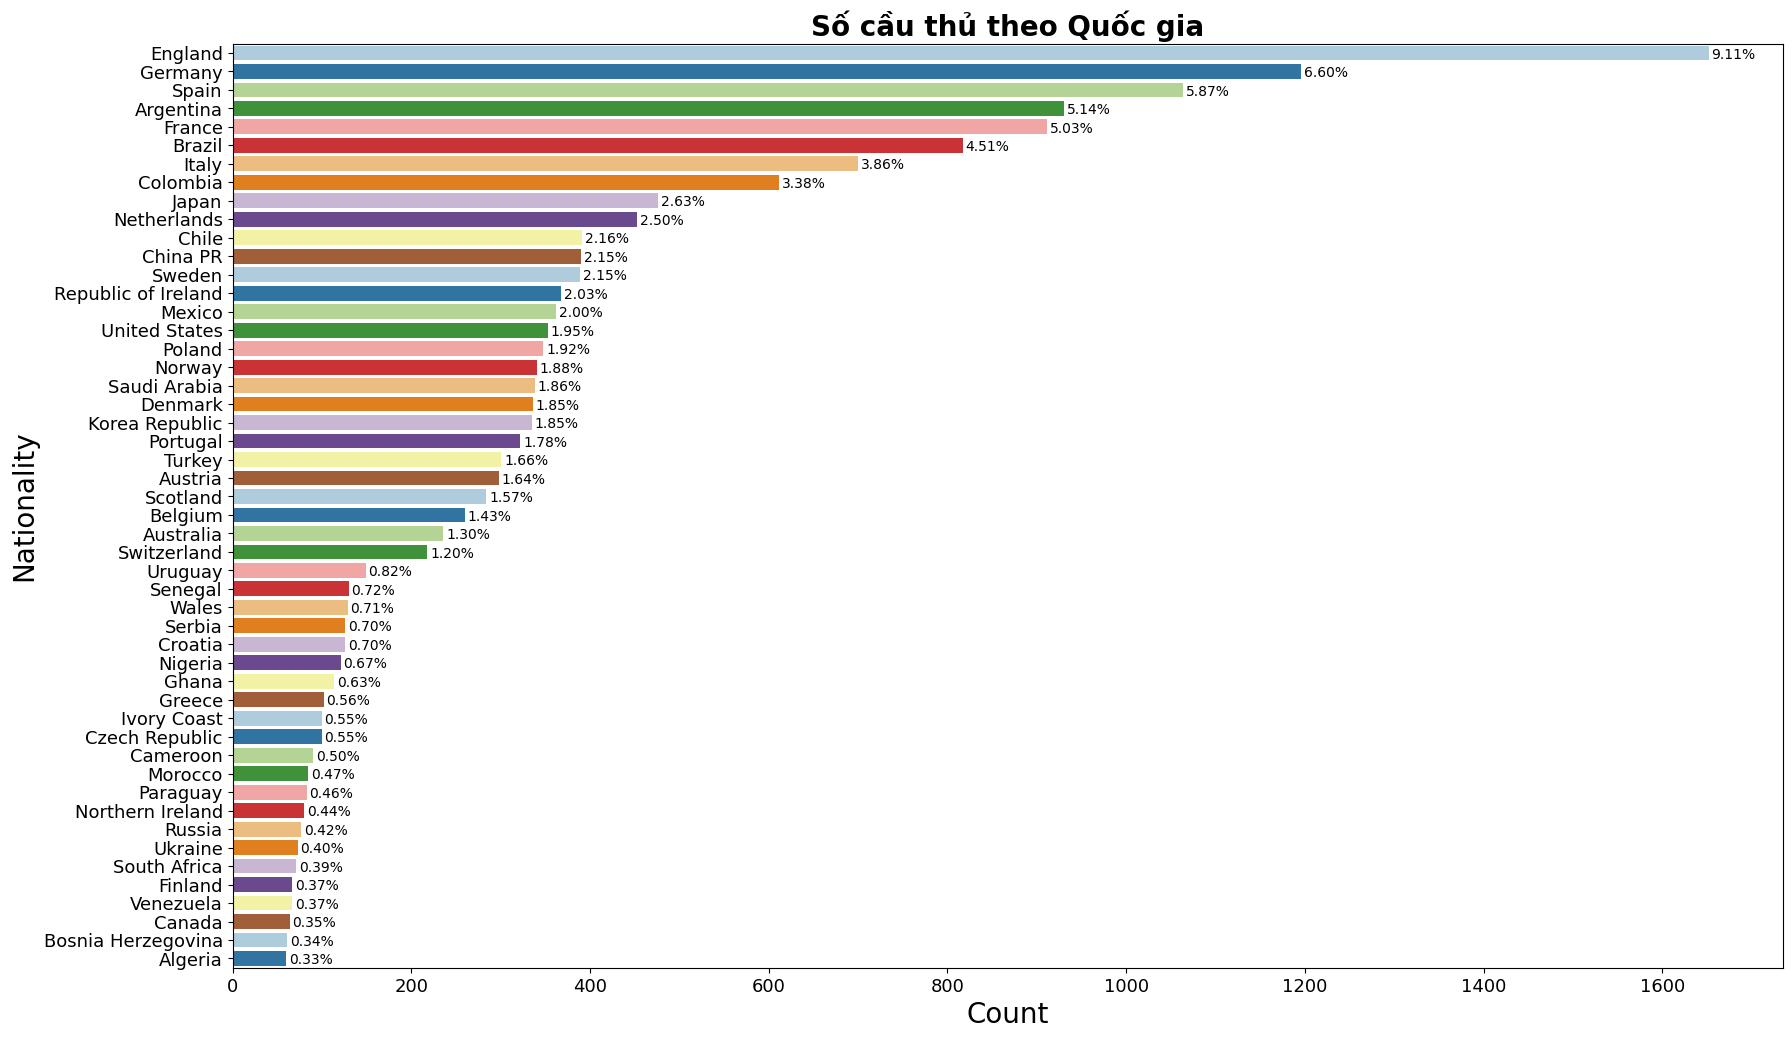

In [22]:
order = fifa['Nationality'].value_counts(ascending=False).head(50).index
plt.figure(figsize=(20,12))

ax = sns.countplot(y="Nationality", data=fifa, order=order, palette='Paired')
ax.set_xlabel('Count',fontsize=20)
ax.set_ylabel('Nationality', fontsize=20)
ax.set_title('Số cầu thủ theo Quốc gia',fontsize=20, weight='bold')

total = len(fifa['Nationality'])
for p in ax.patches:
        percentage ='{:.2f}%'.format(100 * p.get_width()/total)
        width, height =p.get_width(),p.get_height()
        x=p.get_x()+width+3
        y=p.get_y()+height-0.1
        ax.annotate(percentage,(x,y))
plt.xticks(fontsize =13)
plt.yticks(fontsize =13)
plt.show()

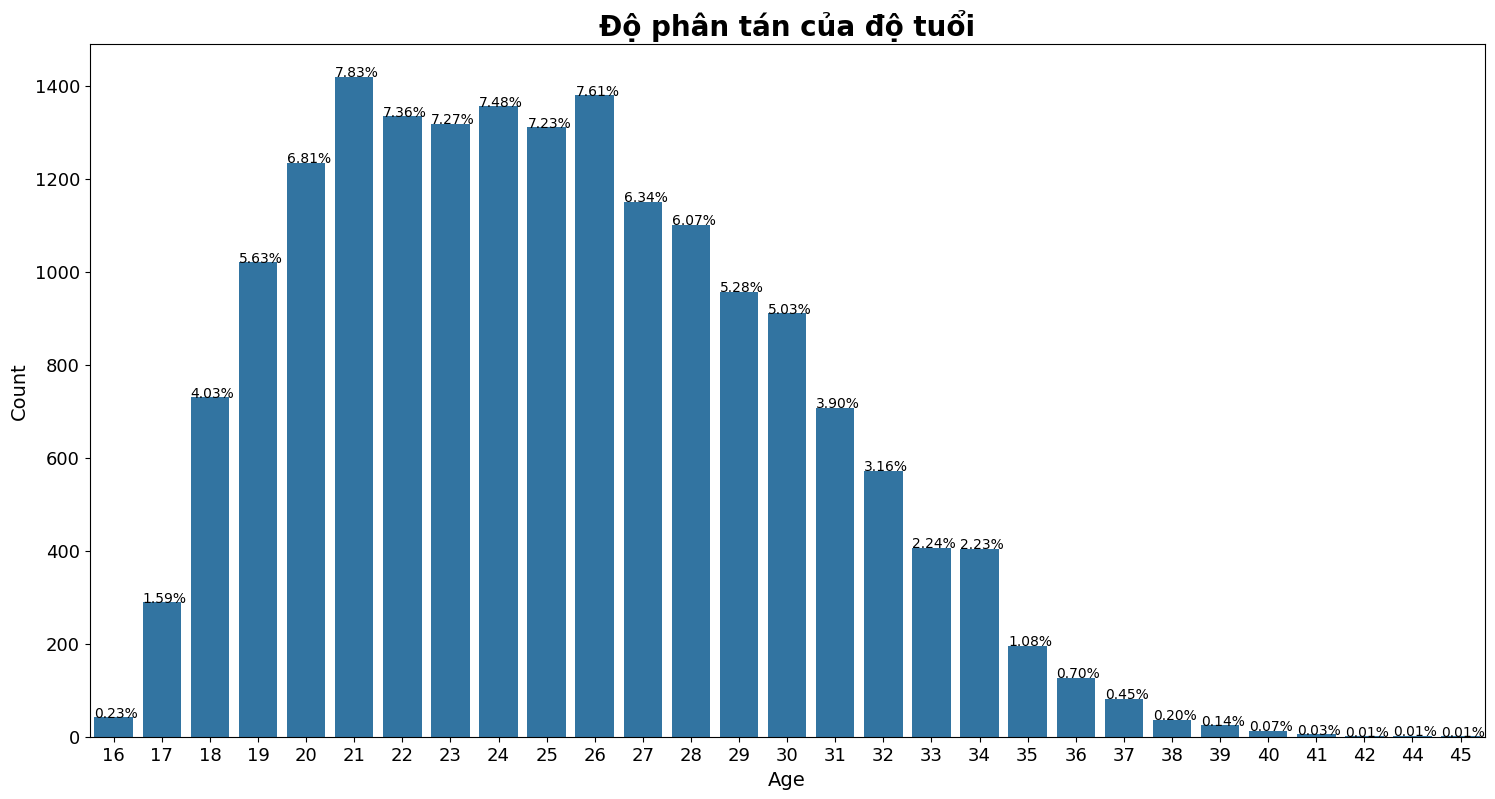

In [19]:
plt.figure(figsize=(18,9))
ax = sns.countplot(x="Age", data=fifa)
ax.set_xlabel('Age',fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Độ phân tán của độ tuổi',fontsize=20, weight='bold')

total = len(fifa['Age'])
for p in ax.patches:
        percentage ='{:.2f}%'.format(100 * p.get_height()/total)
        width, height =p.get_width(),p.get_height()
        x=p.get_x()+width-0.8
        y=p.get_y()+height
        ax.annotate(percentage,(x,y))

plt.xticks(fontsize =13)
plt.yticks(fontsize =13)
plt.show()

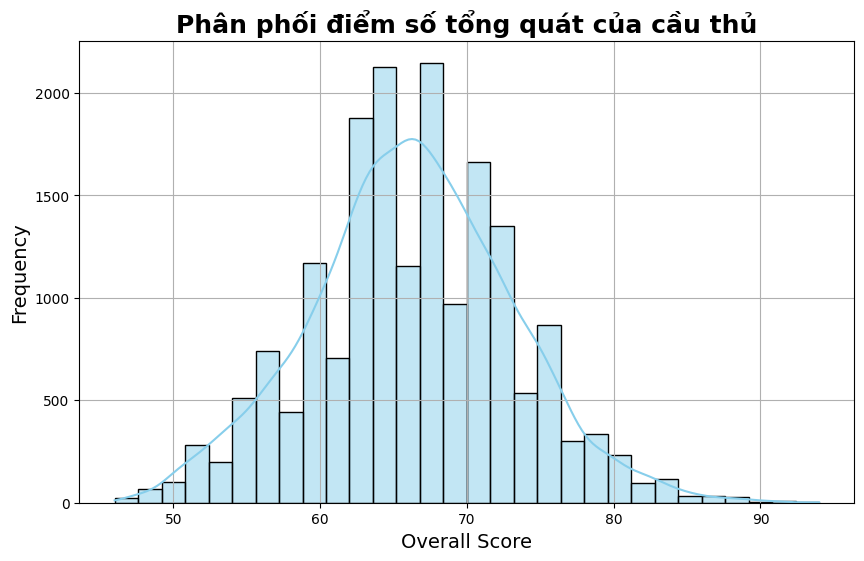

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(fifa['Overall'], bins=30, kde=True, color='skyblue', edgecolor='black')

plt.title('Phân phối điểm số tổng quát của cầu thủ', fontsize=18, weight='bold')
plt.xlabel('Overall Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()


# Độ tương quan

In [49]:
df = fifa.copy()
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110000000,565000,2202,...,75,96,33,28,26,6,11,15,14,8
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000,405000,2228,...,85,95,28,31,23,7,11,15,14,11
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118000000,290000,2143,...,81,94,27,24,33,9,9,15,15,11
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000,260000,1471,...,40,68,15,21,13,90,85,87,88,94
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000,355000,2281,...,79,88,68,58,51,15,13,5,10,13


In [32]:
print(df.columns[28:54])

Index(['FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning'],
      dtype='object')


In [50]:
drop_cols = df.columns[28:54]
df = df.drop(drop_cols, axis = 1)
df = df.drop(['ID'], axis = 1)
df = df.dropna()
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,GKReflexes
0,L. Messi,31,Argentina,94,94,FC Barcelona,110000000,565000,2202,Left,...,174,72,84,95,70,90,86,97,93,8
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000,405000,2228,Right,...,189,83,84,94,89,81,87,88,81,11
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118000000,290000,2143,Right,...,180,68,79,87,62,84,84,96,88,11
3,De Gea,27,Spain,91,93,Manchester United,72000000,260000,1471,Right,...,195,76,17,13,21,50,13,18,21,94
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000,355000,2281,Right,...,156,70,93,82,55,92,82,86,85,13


In [51]:
df = df.select_dtypes(exclude=['object'])

<Axes: >

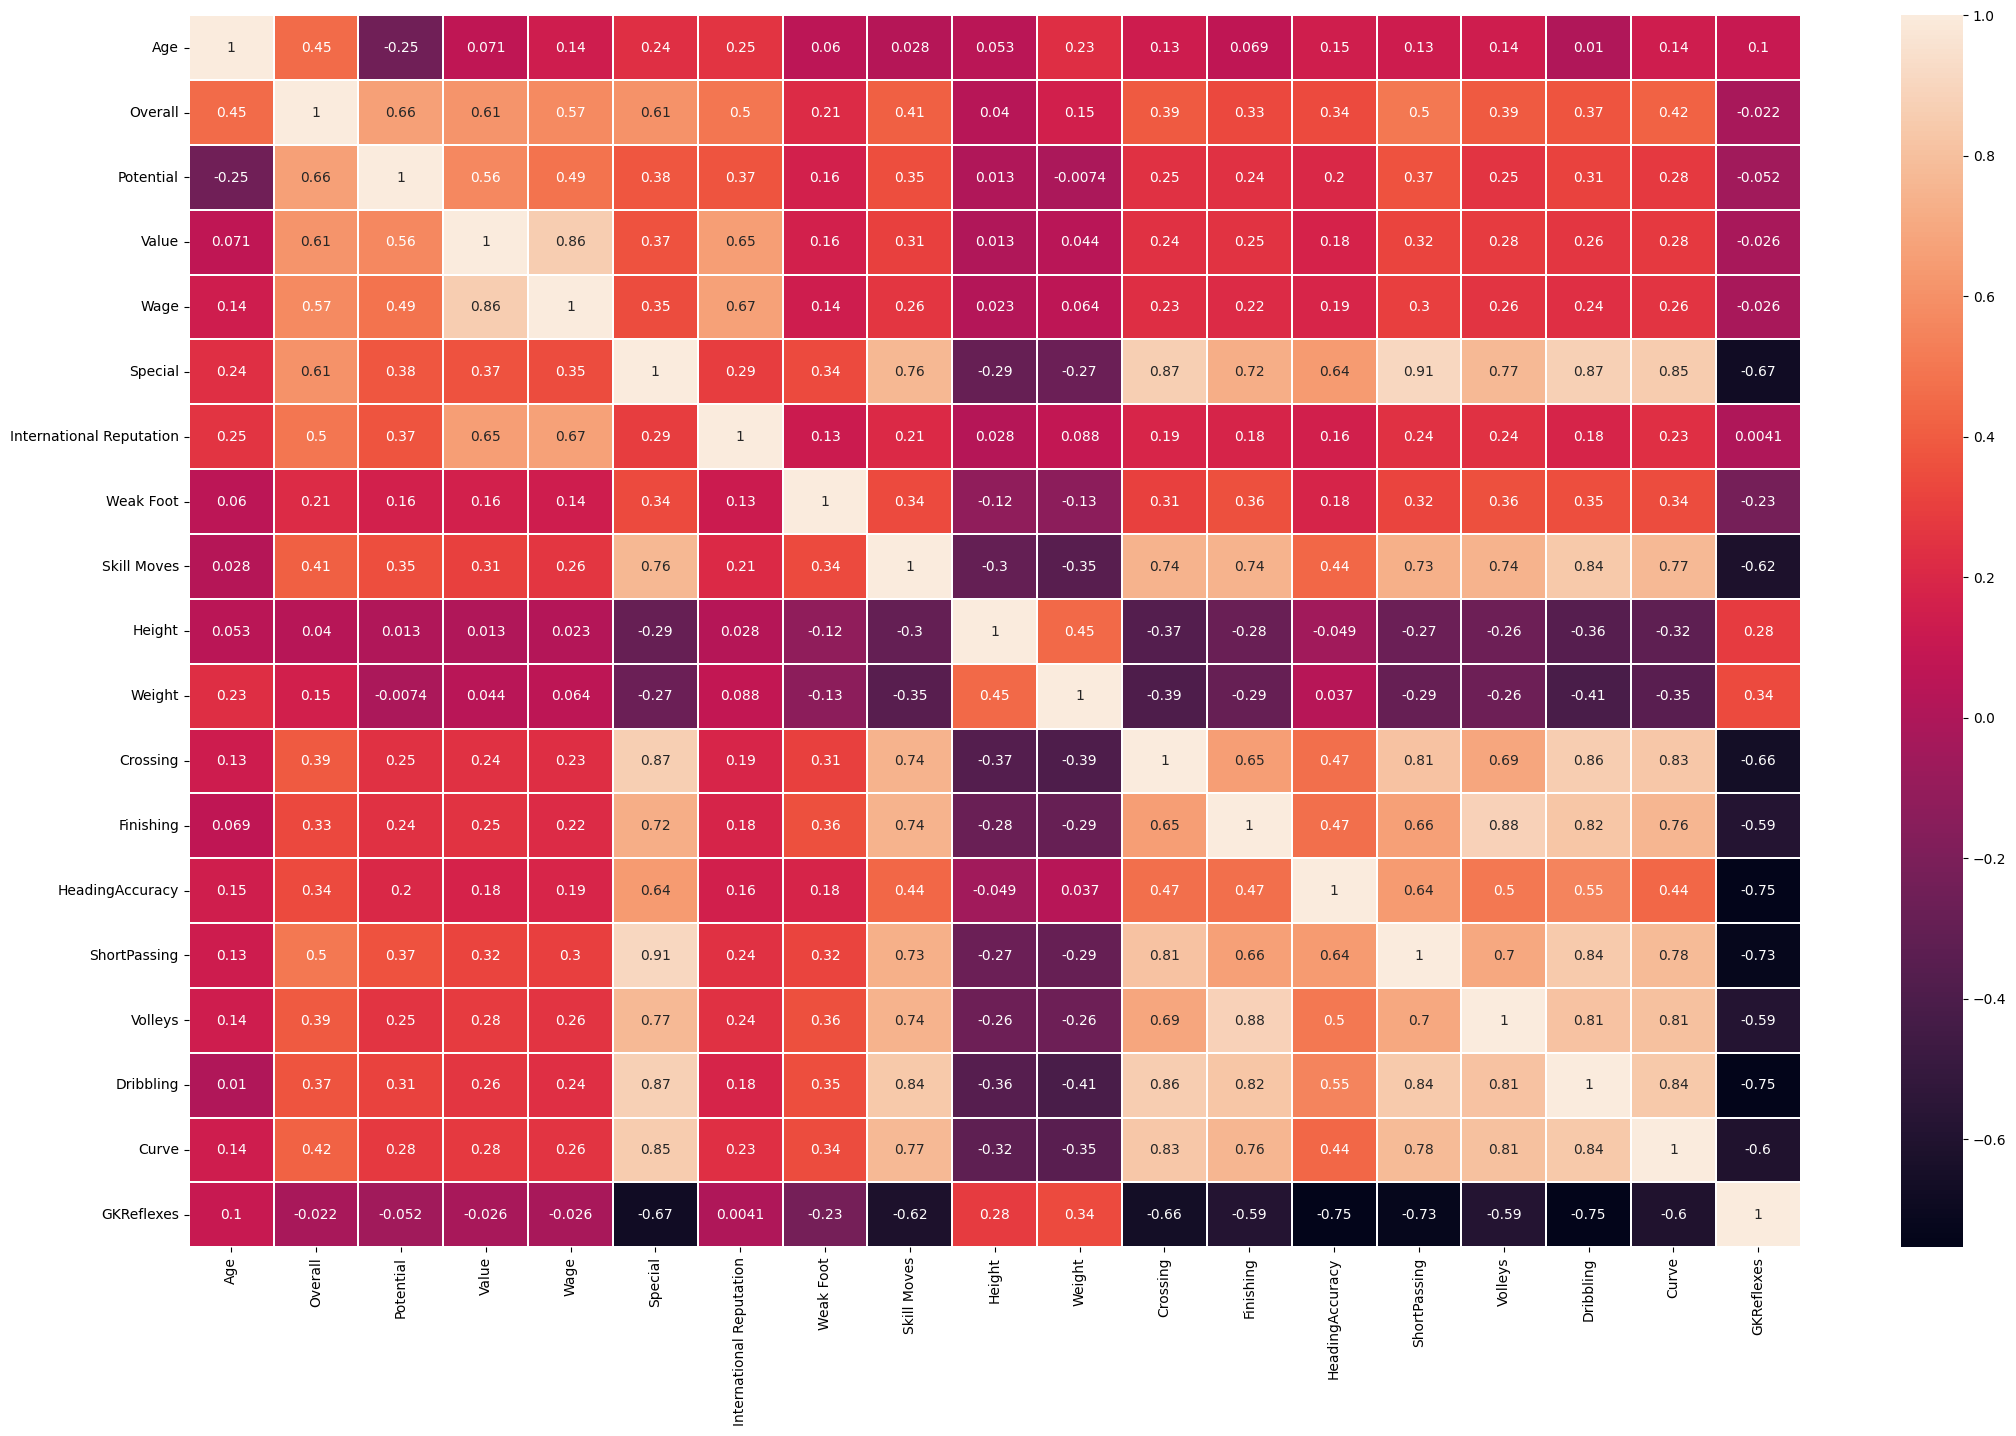

In [36]:
corrmat = df.corr()
f, ax = plt.subplots(figsize =(26, 16))
sns.heatmap(corrmat, ax = ax,  linewidths = 0.1, annot=True)

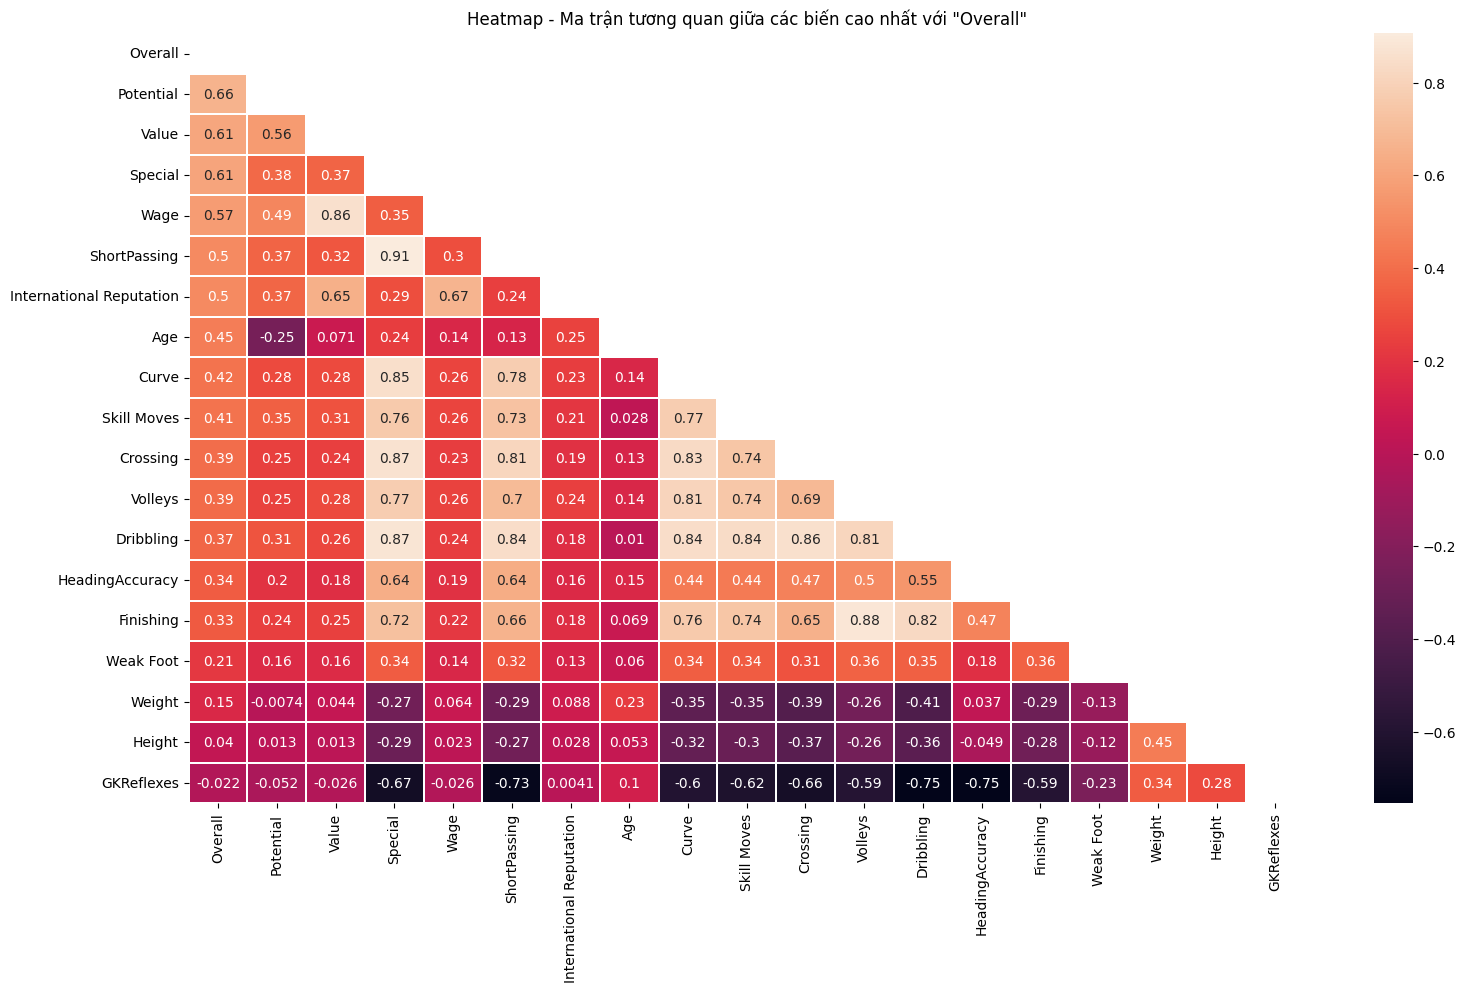

In [39]:
k = 19
corrmat = df.corr()

f, ax = plt.subplots(figsize =(18, 10))
one_cols = np.ones_like(corrmat, dtype=bool)
mask = np.triu(one_cols)
adjusted_mask = mask[1:, :-1]

cols = corrmat.nlargest(k, 'Overall')['Overall'].index
cm = np.corrcoef(df[cols].values.T)

sns.heatmap(cm,  mask = mask, annot=True, linewidths = 0.1, yticklabels = cols.values, xticklabels = cols.values)
plt.title('Heatmap - Ma trận tương quan giữa các biến cao nhất với "Overall"')
plt.show()

# Linear cài tay

In [57]:
target = df['Overall']
features = df.drop(['Overall','Dribbling','HeadingAccuracy','Finishing','Weak Foot'], axis=1)

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

r2 score: 0.9075005631815365
RMSE: 2.0628198498081325
Độ quan trọng của các đặc trưng:
Skill Moves: 0.8484803555122544
International Reputation: 0.7810732007036396
Age: 0.6706235708950399
Potential: 0.6152211413694743
GKReflexes: 0.08746341678844843
Weight: 0.07066660898535386
Curve: 0.036046282985473986
Height: 0.018282100871915657
ShortPassing: 0.01482060081917514
Volleys: 0.01463410678107513
Crossing: 0.012191215863626132
Special: 0.012045003644376487
Wage: 1.9772517475059335e-07
Value: 1.680792929032214e-07


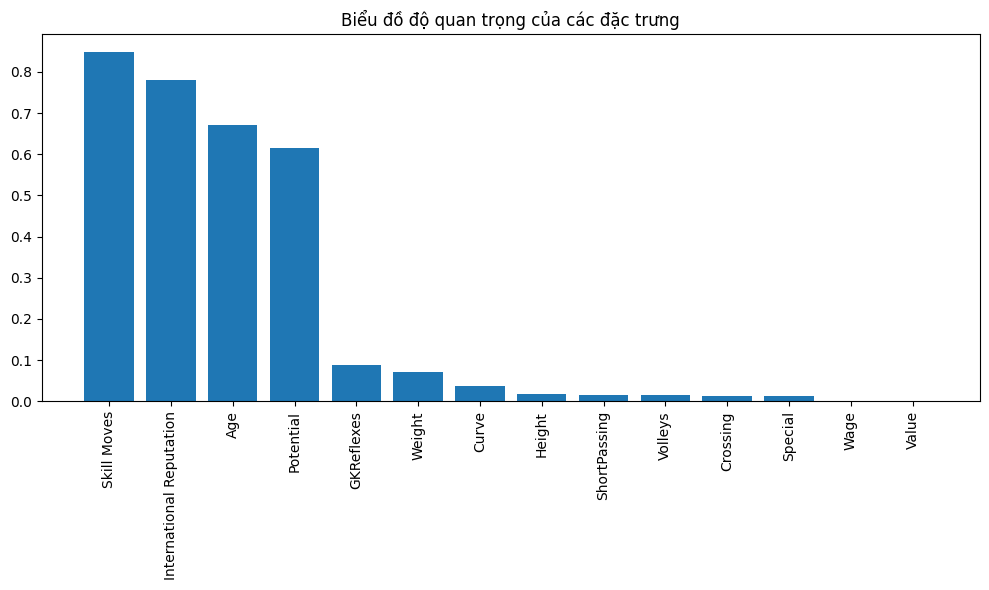

In [59]:
# Dự đoán từ mô hình hồi quy tuyến tính thủ công
def manual_predict(X, w):
    X = np.column_stack((np.ones(X.shape[0]), X))  # Thêm cột bias
    return X.dot(w)  # Dự đoán giá trị

# Thêm cột bias (1s) vào X_train và X_test
X_train = np.column_stack((np.ones(X_train.shape[0]), X_train))
X_test = np.column_stack((np.ones(X_test.shape[0]), X_test))

# w = (X^T X)^{-1} X^T y
w = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

# Dự đoán cho tập test
predictions = X_test.dot(w)

# Tính r2 score
ss_res = np.sum((y_test - predictions) ** 2)  # residual sum of squares
ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)  # total sum of squares
r2 = 1 - (ss_res / ss_tot)
print('r2 score:', r2)

# Tính RMSE
rmse = np.sqrt(np.mean((y_test - predictions) ** 2))
print('RMSE:', rmse)


importances = np.abs(w[1:])


feature_names = features.columns
sorted_indices = np.argsort(importances)[::-1]

print("Độ quan trọng của các đặc trưng:")
for idx in sorted_indices:
    print(f"{feature_names[idx]}: {importances[idx]}")


plt.figure(figsize=(10, 6))
plt.title("Biểu đồ độ quan trọng của các đặc trưng")
plt.bar(range(len(importances)), importances[sorted_indices], align="center")
plt.xticks(range(len(importances)), feature_names[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()


# LINEAR THƯ VIỆN

In [60]:
print( target.head())
print(features.head())

0    94
1    94
2    92
3    91
4    91
Name: Overall, dtype: int64
   Age  Potential      Value    Wage  Special  International Reputation  \
0   31         94  110000000  565000     2202                         5   
1   33         94   77000000  405000     2228                         5   
2   26         93  118000000  290000     2143                         5   
3   27         93   72000000  260000     1471                         4   
4   27         92  102000000  355000     2281                         4   

   Skill Moves  Height  Weight  Crossing  ShortPassing  Volleys  Curve  \
0            4     174      72        84            90       86     93   
1            5     189      83        84            81       87     81   
2            5     180      68        79            84       84     88   
3            1     195      76        17            50       13     21   
4            4     156      70        93            92       82     85   

   GKReflexes  
0           8  
1   

R2 score: 0.9098314237483285
RMSE: 2.0918265975476737
Độ quan trọng của các đặc trưng:
Skill Moves: 0.8725381399259421
International Reputation: 0.76835561142002
Age: 0.6743416965893632
Potential: 0.6165445385834983
GKReflexes: 0.08839605799457341
Weight: 0.06920625231568543
Curve: 0.03736307124551081
ShortPassing: 0.01982739874552134
Height: 0.018180799342649028
Volleys: 0.012476119657766193
Special: 0.011539854156277608
Crossing: 0.009514575779107566
Wage: 2.368655238825859e-06
Value: 1.7668224949751732e-07


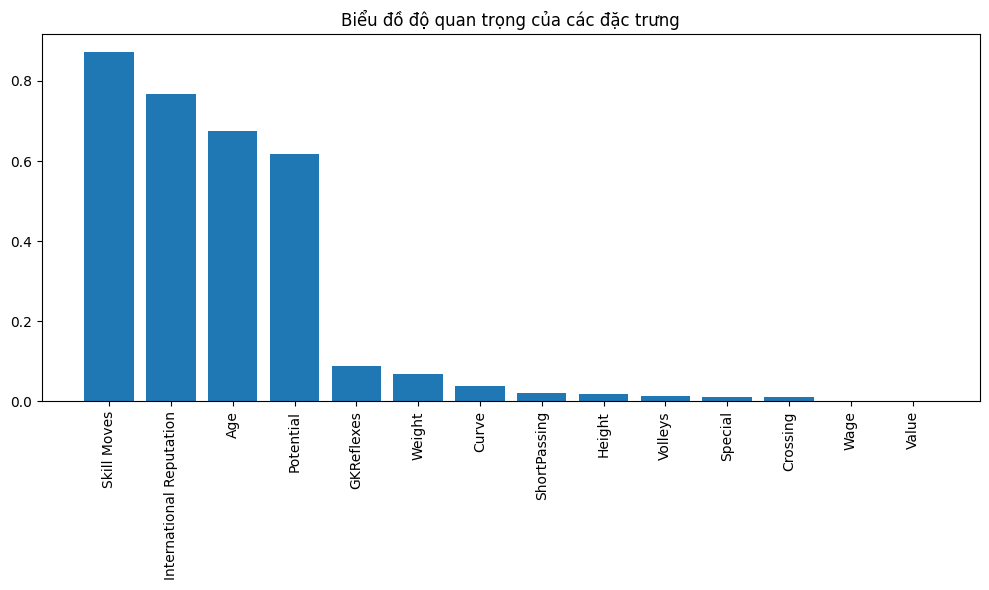

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

model = LinearRegression()


model.fit(X_train, y_train)

predictions = model.predict(X_test)


r2 = r2_score(y_test, predictions)
print('R2 score:', r2)

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('RMSE:', rmse)

importances = np.abs(model.coef_)


feature_names = X_train.columns
sorted_indices = np.argsort(importances)[::-1]

print("Độ quan trọng của các đặc trưng:")
for idx in sorted_indices:
    print(f"{feature_names[idx]}: {importances[idx]}")


plt.figure(figsize=(10, 6))
plt.title("Biểu đồ độ quan trọng của các đặc trưng")
plt.bar(range(len(importances)), importances[sorted_indices], align="center")
plt.xticks(range(len(importances)), feature_names[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()


# Streamlit

In [72]:
fifa.to_csv('processed_data.csv', index=False)

In [91]:
!pkill ngrok
!pip install streamlit
!pip install eli5
!pip install -q streamlit pyngrok
!pip install bcrypt
!pip install pyngrok
!pip install --upgrade pyngrok
!ngrok authtoken 2mB591MfsuJshzUIhTHzuZUv0Gn_5VEn6NQ2C8cd9qAS3GZwL

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [103]:
from pyngrok import ngrok

# Tạo đường hầm cho cổng 8501
public_url = ngrok.connect(8502, "http")
print(f"Access your Streamlit app at: {public_url}")

# Khởi động ứng dụng Streamlit
!streamlit run app.py &>/dev/null&

Access your Streamlit app at: NgrokTunnel: "https://8412-35-185-228-15.ngrok-free.app" -> "http://localhost:8502"


# App

In [95]:
import streamlit as st
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
# Trang Dự đoán: Dự đoán chỉ số cầu thủ
st.title("🎯 Dự đoán Chỉ số Overall của Cầu thủ ⚽")
st.markdown("Nhập các thông số dưới đây để dự đoán chỉ số Overall của cầu thủ.")

# Đọc dữ liệu
df = pd.read_csv('processed_data.csv')
X_train = df[['Reactions', 'Potential', 'Age', 'International Reputation', 'Skill Moves']]
y_train = df['Overall'].values

# Các đặc trưng đầu vào
reactions = st.number_input("Reactions", min_value=0, max_value=100, value=50)
potential = st.number_input("Potential", min_value=0, max_value=100, value=50)
age = st.number_input("Age", min_value=15, max_value=50, value=25)
international_reputation = st.number_input("International Reputation", min_value=1, max_value=5, value=3)
skill_moves = st.number_input("Skill Moves", min_value=1, max_value=5, value=3)

# Hàm hồi quy tuyến tính thủ công
def manual_linear_regression(X, y):
    X = np.column_stack((np.ones(X.shape[0]), X))  # Thêm cột bias (hệ số tự do)
    w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)  # Tính hệ số hồi quy
    return w

# Dự đoán từ mô hình hồi quy tuyến tính thủ công
def manual_predict(X, w):
    X = np.column_stack((np.ones(X.shape[0]), X))  # Thêm cột bias
    return X.dot(w)  # Dự đoán giá trị

# Nút để dự đoán
if st.button("🔮 Dự đoán"):
    input_data = pd.DataFrame([[reactions, potential, age, international_reputation, skill_moves]],
                               columns=['Reactions', 'Potential', 'Age', 'International Reputation', 'Skill Moves'])
    w = manual_linear_regression(X_train.values, y_train)  # Tính toán hệ số hồi quy

    # Dự đoán
    predicted_overall = manual_predict(input_data.values, w)  # Dự đoán chỉ số Overall
    st.success(f"Dự đoán chỉ số Overall của cầu thủ: {predicted_overall[0]:.2f}")  # Hiển thị kết quả
st.markdown("### 📊 Compare Players")
st.write("Choose two or more players to compare their attributes.")

# Select players for comparison
player_names = st.multiselect("Select players", options=df['Name'].unique())

if len(player_names) > 1:
    # Filter data for selected players
    selected_players = df[df['Name'].isin(player_names)][['Name', 'Reactions', 'Potential', 'Age', 'International Reputation', 'Skill Moves', 'Overall']]

    # Display the selected players' data
    st.dataframe(selected_players)

    # Plot comparison chart
    st.markdown("### Attribute Comparison")
    fig, ax = plt.subplots(figsize=(10, 6))
    selected_players.set_index('Name').plot(kind='bar', ax=ax)
    plt.title("Comparison of Player Attributes")
    plt.ylabel("Attribute Value")
    plt.xticks(rotation=45)
    st.pyplot(fig)

2024-11-19 09:14:48.215 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-19 09:14:48.217 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-19 09:14:48.220 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-19 09:14:48.221 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-19 09:14:48.347 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-19 09:14:48.348 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-19 09:14:48.352 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-19 09:14:48.353 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar